
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        75
           1       0.90      0.80      0.85        75

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150


Bagging Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.95      0.90        75
           1       0.94      0.85      0.90        75

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150


Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        75
           1       0.92      0.88      0.90        75

    accuracy                           0.90       150
   macro avg       0.9

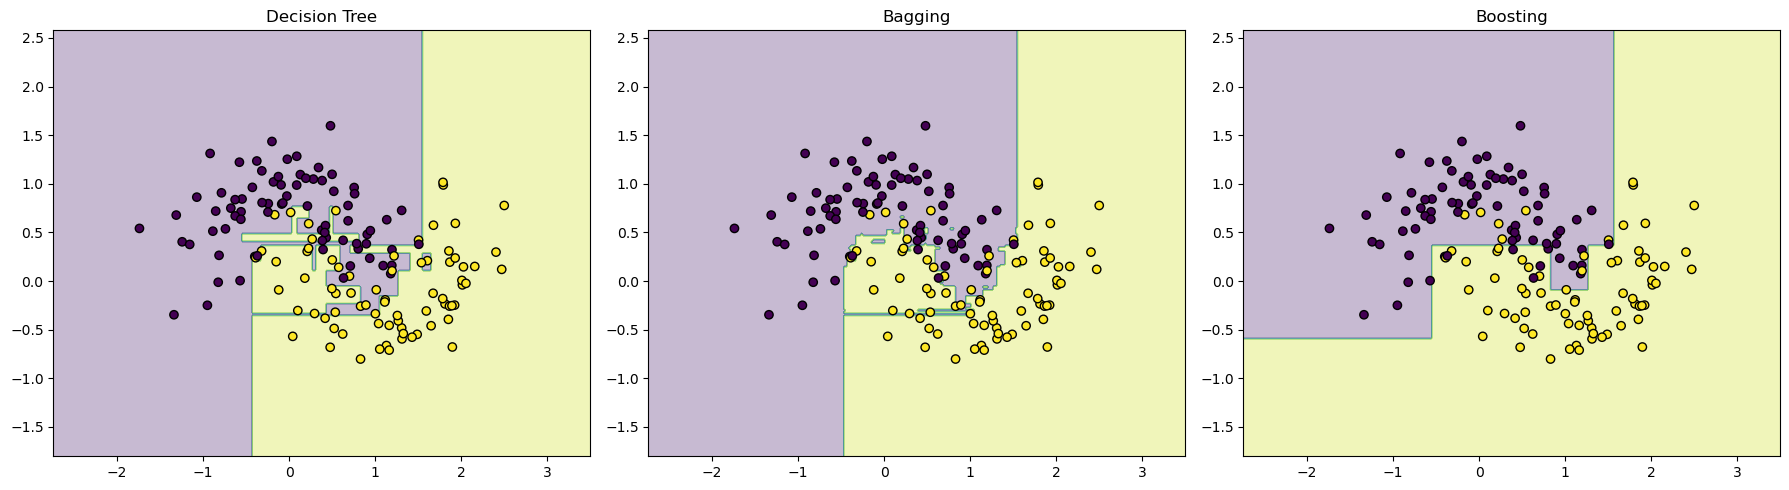

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

# Generate dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'Boosting': AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_decision_boundary(model, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax.set_title(title)

for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(model, X_test, y_test, ax, name)

plt.tight_layout()
plt.show()